In [1]:
import numpy as np 
import scipy.signal as signal
import matplotlib.pyplot as plt
import control as ctrl
import seaborn as sns
import cmath
import warnings
sns.set_style('darkgrid')
warnings. filterwarnings("ignore") 

In [2]:
s = ctrl.TransferFunction.s
Hnorm = (453622744.6*s**2)/(s**4 + s**3*32786.3706 + s**2*537594936.7 + s*1.318*10**12 + 1.617*10**15)
Horig = (s**2*(4.564*10**8))/(s**4+s**3*(3.288*10**4) + s**2*(5.405*10**8)+s*(1.324*10**12)+1.622*10**15)
H = (s**2*(4.564*10**8))/(s**4+s**3*(3.288*10**4) + s**2*(5.405*10**8)+s*(1.324*10**12)+1.622*10**15)

# Polos y ceros

In [9]:
ctrl.pole(H)

array([-15107.16750328+15105.57289613j, -15107.16750328-15105.57289613j,
        -1332.83249672 +1333.19912847j,  -1332.83249672 -1333.19912847j])

In [10]:
p1 = np.complex(-1332.8325,1333.1992)
p2 = np.conj(p1)
p3 = np.complex(-15107.1675,15105.5729)
p4 = np.conj(p3)

np.abs(p1)

1885.1691117607697

In [11]:
ctrl.zero(H)

array([0., 0.])

Text(0, 0.5, 'j w')

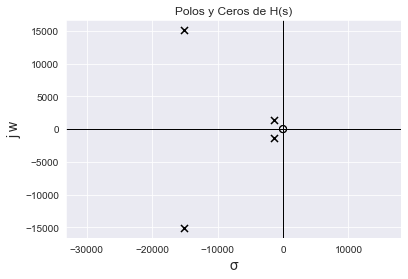

In [5]:
sns.set_style('darkgrid')
p, z = ctrl.pzmap(H, title = 'Polos y Ceros de H(s)')
plt.xlabel('σ', fontsize = 14)
plt.ylabel('j w', fontsize = 14)

# Respuesta a excitaciones

In [13]:
sns.set_style('darkgrid')

s = ctrl.TransferFunction.s
H = (s**2*(4.564*10**8))/(s**4+s**3*(3.288*10**4) + s**2*(5.405*10**8)+s*(1.324*10**12)+1.622*10**15)

## Respuesta al escalon

Text(0.5, 1.0, 'Respuesta al escalon')

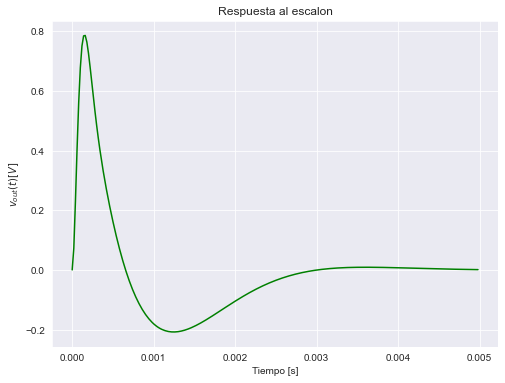

In [43]:
#grafico respuesta al escalon 
plt.figure(figsize= (8,6))
t, h = ctrl.step_response(H, T = t1, transpose= True)
sns.lineplot(x=t,y=h, color='g')
plt.xlabel('Tiempo [s]')
plt.ylabel("$v_{out}(t) [V]$")
plt.title("Respuesta al escalon")
#me tira un warning de result may not be accurate pero graficando lo que obtuve analiticamente en desmos
#obtengo el mismo grafico.

In [32]:
t1 = np.arange(0,0.005,0.00002)

In [30]:
t1

array([0.00000e+00, 1.00000e-08, 2.00000e-08, ..., 4.99997e-03,
       4.99998e-03, 4.99999e-03])

## Respuesta al impulso

Text(0.5, 1.0, 'Respuesta al impulso')

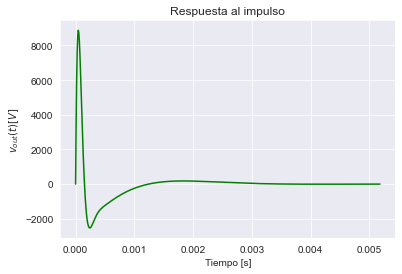

In [492]:
t,h = ctrl.impulse_response(H)
sns.lineplot(x=t,y=h, color='g')
plt.xlabel('Tiempo [s]')
plt.ylabel("$v_{out}(t) [V]$")
plt.title("Respuesta al impulso")

In [107]:
def res(p,a,b,c,d,e):
    return (p**2)/((p-a)*(p-b)*(p-c)*(p-d)*(p-e))

In [104]:
p1 = complex(-1332.8325,1333.1991)
p2 = complex(-1332.8325,-1333.1991)
p3 = complex(-15107.1675,15105.5729)
p4 = complex(-15107.1675,-15105.5729)

In [115]:
w = 10000
p5 = complex(0,w)
p6 = complex(0,-w)

In [114]:
res(p6,p1,p2,p3,p4,p5)

(-4.49250111535386e-14+9.705083381597635e-14j)

## Respuesta a sen(wt) con w = 10000

In [190]:
t = np.arange(0,0.005,0.00001)

def v1(x):
    return np.exp(-1332.8325*x)*(-0.2906*np.cos(1333.1991*x)-0.0154*np.sin(1333.1991*x))

def v2(x):
    return np.exp(-15107.1675*x)*(0.7007*np.cos(15105.5729*x)+0.09*np.sin(15105.5729*x))

def v3(x):
    return -0.4101*np.cos(10000*x)+0.8859*np.sin(10000*x)

def respuesta(t):
    return (v1(t) + v2(t) + v3(t))

Text(0, 0.5, '$V_{out}(t)\\quad [V]$')

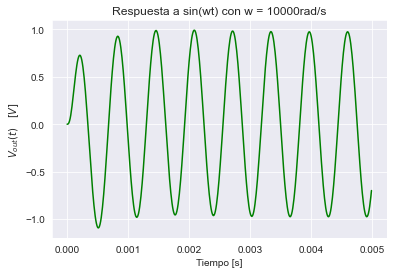

In [191]:
sns.lineplot(x = t, y = respuesta(t), color = 'g')
plt.title("Respuesta a sin(wt) con w = 10000rad/s")
plt.xlabel('Tiempo [s]')
plt.ylabel('$V_{out}(t)\quad [V]$')

# Normalizando componentes

## Pasabajo

In [48]:
E96 = [100,102,105,107,110,113,115,118,121,124,127,130,133,137,140,143,147,150,154,158,162,165,169,174,178,182,187,191,
196,200,205,210,215,221,226,232,237,243,249,255,261,267,274,280,287,294,301,309,316,324,332,340,348,357,365,374,383,392,
402,412,422,432,442,453,464,475,487,499,511,523,536,549,562,576,590,604,619,634,649,665,681,698,715,732,750,768,787,
806,825,845,866,887,909,931,953,976]

In [49]:
E24 = [10,11,12,13,15,16,18,20,22,24,27,30,33,36,39,43,47,51,56,62,68,75,82,91]

In [50]:
posiblesR = []
for x in E96:
    posiblesR.append(x*10)
    posiblesR.append(x*10**2)
    posiblesR.append(x*10**3)
    posiblesR.append(x*10**4)
    
posiblesC = []
for x in E24:
    posiblesC.append(x*10**(-10)) 
    posiblesC.append(x*10**(-9))
    posiblesC.append(x*10**(-8))


In [51]:
w_ideal = 21363.633645
q_ideal = 0.7071

In [ ]:
# x: R1 ---- y: R2

for c1 in posiblesC:
    for c2 in posiblesC:
        for x in posiblesR:
            for y in posiblesR:
                w_norm = 1/(np.sqrt(x*y*c1*c2))
                q_norm = np.sqrt(x*y*c1*c2)*(1/(x*(c1+c2) + y*c2 - x*c1))
                ew = (np.abs(w_ideal - w_norm)/w_ideal)*100
                eq = (np.abs(q_ideal - q_norm)/q_ideal)*100
                if (ew < 1) and (eq < 1):
                    print('R1=',x,'R2=',y,'c1=',c1,'c2=',c2, 'ew=',ew,'eq=',eq)


Algunos posibles valores a usar 

R1= 3480 R2= 63400 c1= 1e-08 c2= 1e-09 ew= 0.34694268022309654 eq= 0.6753257859892755

R1= 8870 R2= 5230 c1= 1e-08 c2= 4.7e-09 ew= 0.24513264371388074 eq= 0.3531038842103281

R1= 5360 R2= 8660 c1= 1e-08 c2= 4.7e-09 ew= 0.21543324547991152 eq= 0.24519408352892705

R1= 5230 R2= 8870 c1= 1e-08 c2= 4.7e-09 ew= 0.24513264371388074 eq= 0.3531038842103595

R1= 3570 R2= 47500 c1= 1e-08 c2= 1.3e-09 ew= 0.30524988778997164 eq= 0.014401776130069729

## Pasa Altos

In [ ]:
w_ideal = 1885.169112
q_ideal = 0.7072

In [ ]:
# x: R1 ---- y: R2

for c1 in posiblesC:
    for c2 in posiblesC:
        for x in posiblesR:
            for y in posiblesR:
                w_norm = 1/(np.sqrt(x*y*c1*c2))
                q_norm = (w_norm)*((x*c1*c2)/(c1+c2))
                ew = (np.abs(w_ideal - w_norm)/w_ideal)*100
                eq = (np.abs(q_ideal - q_norm)/q_ideal)*100
                if (ew < 1) and (eq < 1):
                    print('R1=',x,'R2=',y,'c1=',c1,'c2=',c2, 'ew=',ew,'eq=',eq)


# Analisis Transferencia normalizada

In [54]:
Hnorm = (453622744.6*s**2)/(s**4 + s**3*32786.3706 + s**2*537594936.7 + s*1.318*10**12 + 1.617*10**15)
Horig = (s**2*(4.564*10**8))/(s**4+s**3*(3.288*10**4) + s**2*(5.405*10**8)+s*(1.324*10**12)+1.622*10**15)

## Respuesta escalon

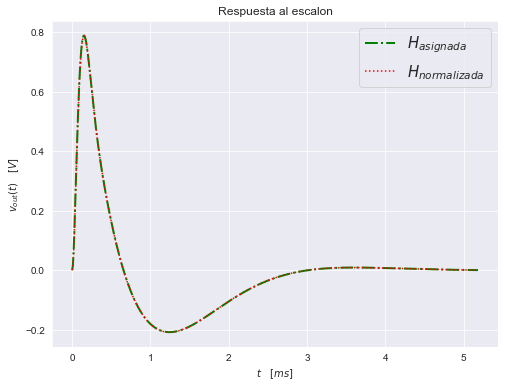

In [55]:
#grafico respuesta al escalon 
sns.set_style('darkgrid')
plt.figure(figsize= (8,6))
t1, h1 = ctrl.step_response(Hnorm)
t2, h2 = ctrl.step_response(Horig)
sns.lineplot(x=1000*t2,y=h2, color='g', linestyle = 'dashdot', label = '$H_{asignada}$', linewidth = 2)
sns.lineplot(x=1000*t1,y=h1, color='r', linestyle = 'dotted', label = '$H_{normalizada}$', linewidth = 1.5)
plt.xlabel('$t\quad [ms]$')
plt.ylabel("$v_{out}(t)\quad [V]$")
plt.title("Respuesta al escalon")
plt.legend(prop={'size': 15})

## Respuesta impulso

In [ ]:
#grafico respuesta al escalon 
sns.set_style('darkgrid')
plt.figure(figsize= (8,6))
t1, h1 = ctrl.impulse_response(Hnorm)
t2, h2 = ctrl.impulse_response(Horig)
sns.lineplot(x=1000*t2,y=h2, color='g', linestyle = 'dashdot', label = '$H_{asignada}$', linewidth = 2)
sns.lineplot(x=1000*t1,y=h1, color='r', linestyle = 'dotted', label = '$H_{normalizada}$', linewidth = 1.5)
plt.xlabel('$t\quad [ms]$')
plt.ylabel("$v_{out}(t)\quad [V]$")
plt.title("Respuesta al impulso")
plt.legend(prop={'size': 15})

## Respuesta sin(wt)

Elijo tres frecuencias caracteristicas para graficar:

$w_{01} = 1885,169112$

$w_{02} = 21363,633645$

$w_m = \frac{w_{01}+w_{02}}{2} = 11624.40138$

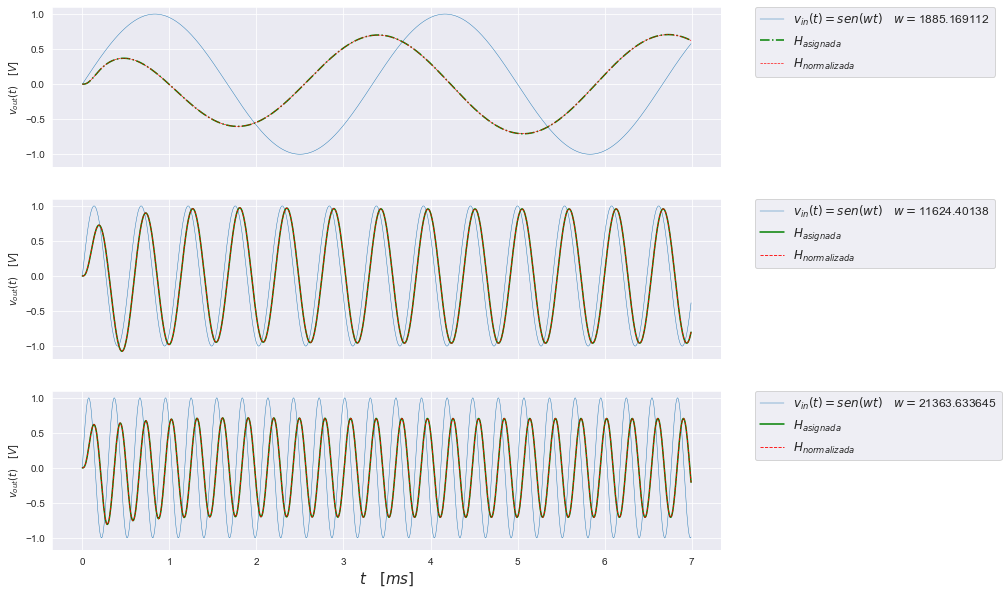

In [31]:
t = np.linspace(0, 7e-3, 1000, endpoint=False)
w1 = 1885.169112
u1 = np.sin(w1 * t)
w2 = 11624.40138
u2 = np.sin(w2 * t)
w3 = 21363.633645
u3 = np.sin(w3 * t)
#plt.figure(figsize = (12,8))
#plt.plot(1000*t,  np.sin(2 * np.pi * f * t))
t1, y1, x1 = ctrl.forced_response(Horig, T = t, U = u1, return_x=True)
t11, y11, x11 = ctrl.forced_response(Hnorm, T = t, U = u1, return_x=True)
t2, y2, x2 = ctrl.forced_response(Horig, T = t, U = u2, return_x=True)
t22, y22, x22 = ctrl.forced_response(Horig, T = t, U = u2, return_x=True)
t3, y3, x3 = ctrl.forced_response(Horig, T = t, U = u3, return_x=True)
t33, y33, x33 = ctrl.forced_response(Horig, T = t, U = u3, return_x=True)



fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize = (12,10))

#senial de entrada
w = [w1,w2,w3]
nom = ['01','m','02']
for x in [0,1,2]:
    sns.lineplot(x = 1000*t, y = np.sin(w[x]*t), ax = axs[x], label = "$v_{in}(t)=sen(wt)\quad w = $"+str(w[x]), linewidth = 0.45)
    
# para w01
sns.lineplot(x = 1000*t1, y = y1, ax = axs[0], color = 'g', label = '$H_{asignada}$', linestyle = '-.')
sns.lineplot(x = 1000*t11, y = y11, ax = axs[0], color = 'r', label = '$H_{normalizada}$', linestyle ='dashed',linewidth=.65)
axs[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 12})
#para wm
sns.lineplot(x = 1000*t2, y = y2, ax = axs[1], color = 'g', label = '$H_{asignada}$')
sns.lineplot(x = 1000*t22, y = y22, ax = axs[1], color = 'r', label = '$H_{normalizada}$', linestyle ='dashed',linewidth=.85)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 12})
#para w02
sns.lineplot(x = 1000*t3, y = y3, ax = axs[2], color = 'g', label = '$H_{asignada}$')
sns.lineplot(x = 1000*t33, y = y33, ax = axs[2], color = 'r', label = '$H_{normalizada}$', linestyle ='dashed',linewidth=.85)
axs[2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 12})


plt.xlabel('$t\quad [ms]$', fontsize = 15)
axs[0].set_ylabel("$v_{out}(t)\quad [V]$")
axs[1].set_ylabel("$v_{out}(t)\quad [V]$")
axs[2].set_ylabel("$v_{out}(t)\quad [V]$")

fig.savefig('respuestaSenoConjunta.png', format='png')

## Respuesta cuadrada

### Frecuencia : $\frac{f_0}{10}$

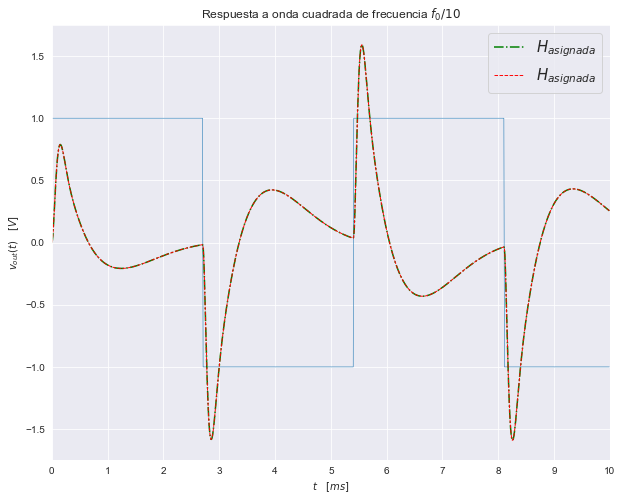

In [45]:
t = np.linspace(0, 10e-3, 1000, endpoint=False)
f = 1850.0809/10
u = signal.square(2 * np.pi * f * t)
sns.set_style('darkgrid')
plt.figure(figsize = (10,8))
plt.plot(1000*t,  signal.square(2 * np.pi * f * t), linewidth= 0.55)
t1, y1, x1 = ctrl.forced_response(Horig, T = t, U = u,return_x=True)
t11, y11, x11 = ctrl.forced_response(Horig, T = t, U = u,return_x=True)
sns.lineplot(x = 1000*t1, y = y1, color = 'g', label = '$H_{asignada}$', linestyle = '-.', linewidth = 1.5)
sns.lineplot(x = 1000*t11, y = y11, color = 'r', label = '$H_{asignada}$', linestyle = 'dashed',linewidth= .95)
plt.xlabel("$t\quad [ms]$")
plt.ylabel("$v_{out}(t)\quad [V]$")
plt.xlim((0,10))
plt.xticks(np.arange(0,11,1))
plt.title("Respuesta a onda cuadrada de frecuencia $f_0/10$")
plt.legend(prop={'size': 15})


### Frecuencia : $f_0$

Text(0.5, 1.0, 'Respuesta a onda cuadrada de frecuencia $f_0$')

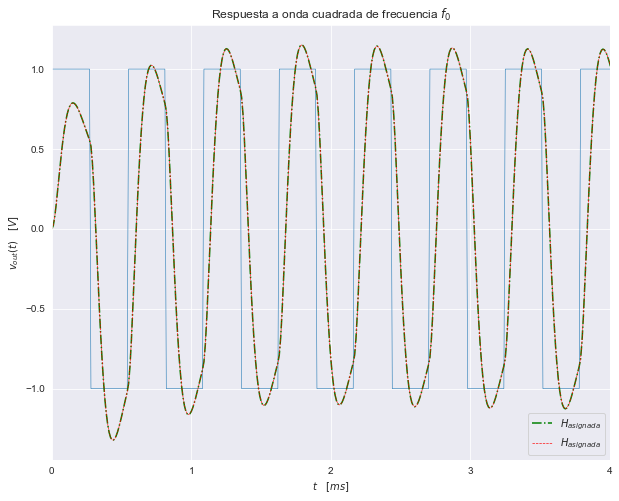

In [47]:
t = np.linspace(0, 10e-3, 1000, endpoint=False)
f = 1850.0809 
u = signal.square(2 * np.pi * f * t)
sns.set_style('darkgrid')
plt.figure(figsize = (10,8))
plt.plot(1000*t,  signal.square(2 * np.pi * f * t), linewidth = .55)
t2, y2, x2 = ctrl.forced_response(Horig, T = t, U = u,return_x=True)
t22, y22, x22 = ctrl.forced_response(Hnorm, T = t, U = u,return_x=True)
sns.lineplot(x = 1000*t2, y = y2, color = 'g', label = '$H_{asignada}$', linestyle = '-.')
sns.lineplot(x = 1000*t22, y = y22, color = 'r', label = '$H_{asignada}$', linestyle = 'dashed',linewidth=.65)
plt.xlabel("$t\quad [ms]$")
plt.ylabel("$v_{out}(t)\quad [V]$")
plt.xlim((0,4))
plt.xticks(np.arange(0,5,1))
plt.title("Respuesta a onda cuadrada de frecuencia $f_0$")


### Frecuencia $10f_0$

Text(0.5, 1.0, 'Respuesta a onda cuadrada de frecuecia $10f_0$')

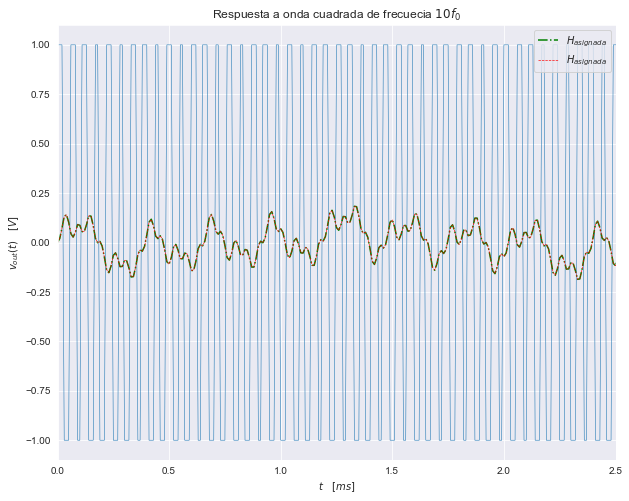

In [4]:
t = np.linspace(0, 10e-3, 1000, endpoint=False)
f = 10*1850.0809 
u = signal.square(2 * np.pi * f * t)
sns.set_style('darkgrid')
plt.figure(figsize = (10,8))
plt.plot(1000*t,  signal.square(2 * np.pi * f * t), linewidth = .55)
t3, y3, x3 = ctrl.forced_response(Horig, T = t, U = u,return_x=True)
t33, y33, x33 = ctrl.forced_response(Hnorm, T = t, U = u,return_x=True)
sns.lineplot(x = 1000*t3, y = y3, color = 'g', label = '$H_{asignada}$', linestyle = '-.')
sns.lineplot(x = 1000*t33, y = y33, color = 'r', label = '$H_{asignada}$', linestyle = 'dashed',linewidth=.65)
plt.xlabel("$t\quad [ms]$")
plt.ylabel("$v_{out}(t)\quad [V]$")
plt.xlim((0,2.5))
#plt.xlim((0,0.5))
#plt.xticks(np.arange(0,3,0.5))
#plt.ylim((-0.2,0.2))
plt.title("Respuesta a onda cuadrada de frecuecia $10f_0$")

## Diagrama de Bode

In [5]:
s = ctrl.TransferFunction.s
Hnorm = (453622744.6*s**2)/(s**4 + s**3*32786.3706 + s**2*537594936.7 + s*1.318*10**12 + 1.617*10**15)
Horig = (s**2*(4.564*10**8))/(s**4+s**3*(3.288*10**4) + s**2*(5.405*10**8)+s*(1.324*10**12)+1.622*10**15)

wbode = np.arange(1e+1,1e+6,1e+1)

magOrig, phaseOrig, omegaOrig = ctrl.bode(Horig,wbode, dB = True, deg = True, plot=False)
magNorm, phaseNorm, omegaNorm = ctrl.bode(Hnorm,wbode,dB=True, deg = True, plot = False)

phaseOriginal = []
for x in phaseOrig:
    phaseOriginal.append(x*(180/cmath.pi))
    
phaseNormalizado = []
for x in phaseNorm:
    phaseNormalizado.append(x*(180/cmath.pi))
    
magdBOrig =[]
for x in magOrig:
    magdBOrig.append(20*np.log10(x))

magdBNorm =[]
for x in magNorm:
    magdBNorm.append(20*np.log10(x))

<Figure size 1080x360 with 0 Axes>

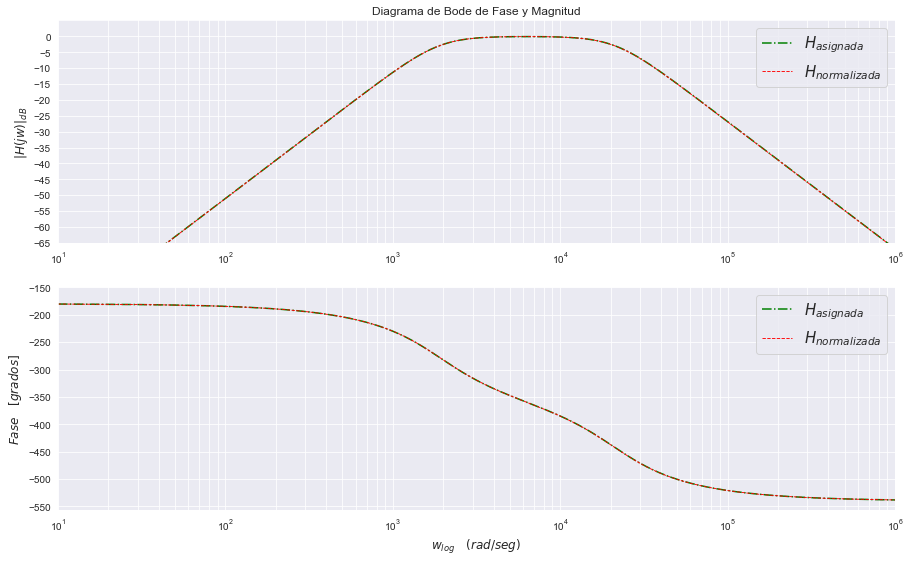

In [63]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(15,9))
plt.figure(figsize= (15,5))
# diagrama de ganancia
sns.lineplot(omegaOrig,magdBOrig, label = "$H_{asignada}$", linestyle = '-.', color = 'g',ax=ax1, linewidth = 1.5)
sns.lineplot(omegaNorm,magdBNorm, label = "$H_{normalizada}$", linestyle = 'dashed', color = 'r', linewidth =.9,ax=ax1)
plt.sca(ax1)
plt.title("Diagrama de Bode de Fase y Magnitud", fontsize = 12)
plt.yticks((np.arange(-65,5,5)))
plt.xlim((1e+1,1e+6))
plt.ylim((-65,5))
plt.xscale("log")
plt.grid(True, which="both", ls="-")
plt.ylabel("$| H(jw) |_{dB}$", fontsize = 12)
plt.legend(prop={'size': 15})

# diagrama de fase 
plt.sca(ax2)
sns.lineplot(omegaOrig,phaseOriginal, label = "$H_{asignada}$", linestyle = '-.', color = 'g',ax=ax2, linewidth = 1.5)
sns.lineplot(omegaNorm,phaseNormalizado, label = "$H_{normalizada}$", linestyle = 'dashed', color = 'r', linewidth =.9,ax=ax2)
plt.xscale("log")
plt.grid(True, which="both", ls="-")
plt.ylabel("$Fase\quad [grados]$", fontsize = 12)
plt.xlabel("$w_{log}\quad (rad/seg)$", fontsize = 12)
plt.legend(prop={'size': 15})
plt.xlim((1e+1,1e+6))
plt.yticks((np.arange(-550,-130,50)))
fig.savefig('diagramaBodeConjunto.png', format='png')

# SIMULANDO EN SPICE

In [3]:
def getTxt(nombre):
    ts,ys = [], []
    with open(nombre,"r") as archivo:
        for linea in archivo:
            row = linea.split()
            x = float(row[0].split(",")[0])
            y = float(row[0].split(",")[1])
            ts.append(x)
            ys.append(y)
    return ts,ys

## Respuesta escalon

(-0.0001, 0.005)

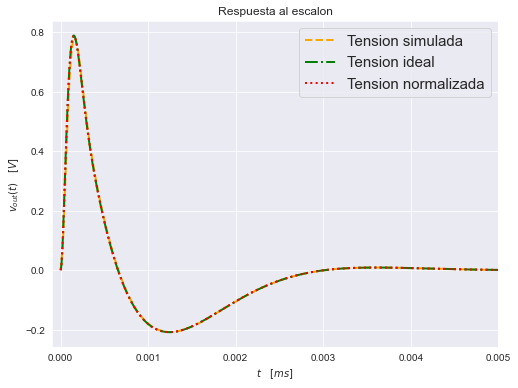

In [23]:
#grafico respuesta al escalon 
ts, ys = getTxt("respuestaEscalon.txt")
sns.set_style('darkgrid')
plt.figure(figsize= (8,6))
t1, h1 = ctrl.step_response(Hnorm)
t2, h2 = ctrl.step_response(Horig)
sns.lineplot(x=ts,y=ys, color='orange', linestyle = 'dashed', label = 'Tension simulada', linewidth = 2)
sns.lineplot(x=t2,y=h2, color='g', linestyle = '-.', label = 'Tension ideal', linewidth = 2)
sns.lineplot(x=t1,y=h1, color='r', linestyle = 'dotted', label = 'Tension normalizada', linewidth = 2)
plt.xlabel('$t\quad [ms]$')
plt.ylabel("$v_{out}(t)\quad [V]$")
plt.title("Respuesta al escalon")
plt.legend(prop={'size': 15})
plt.xlim((-0.0001,0.005))

## Respuesta $sen(2\pi ft)$

In [174]:
11624.40138/(2*cmath.pi)

1850.0809401112497

In [9]:
tseno, yseno = getTxt("respuestaSeno.txt")

Text(0, 0.5, '$v_{out}(t)\\quad [V]$')

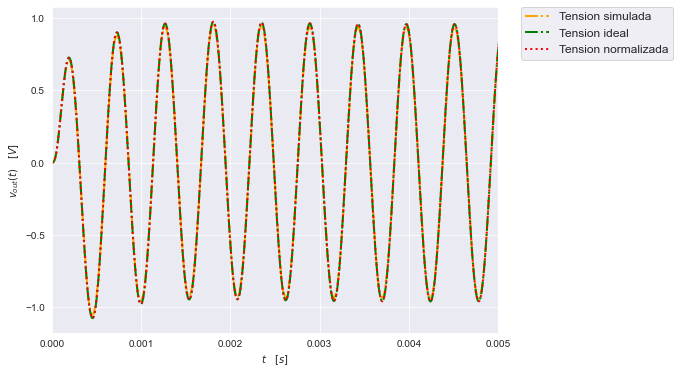

In [10]:
plt.figure(figsize=(8,6))
t = np.linspace(0, 7e-3, 1000, endpoint=False)
u = np.sin(2*cmath.pi*1850.0809*t)
#plt.figure(figsize = (12,8))
#plt.plot(1000*t,  np.sin(2 * np.pi * f * t))
t1, y1, x1 = ctrl.forced_response(Horig, T = t, U = u, return_x=True)
t2, y2, x1 = ctrl.forced_response(Hnorm, T = t, U = u, return_x=True)
sns.lineplot(x = tseno, y = yseno, linestyle = 'dashdot', color ='orange', linewidth = 2, label ="Tension simulada")
sns.lineplot(x = t1, y = y1, linestyle = '-.', color ='g', linewidth = 2, label = "Tension ideal")
sns.lineplot(x = t2, y = y2, linestyle = 'dotted', color ='r', linewidth = 2, label = "Tension normalizada")
plt.xlim(0,0.005)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 12})
plt.xlabel("$t\quad [s]$")
plt.ylabel("$v_{out}(t)\quad [V]$")

## Respuesta cuadrada con $f_0 = 1850.0809$

In [13]:
tcua, ycua = getTxt("respuestaCuadrada.txt")

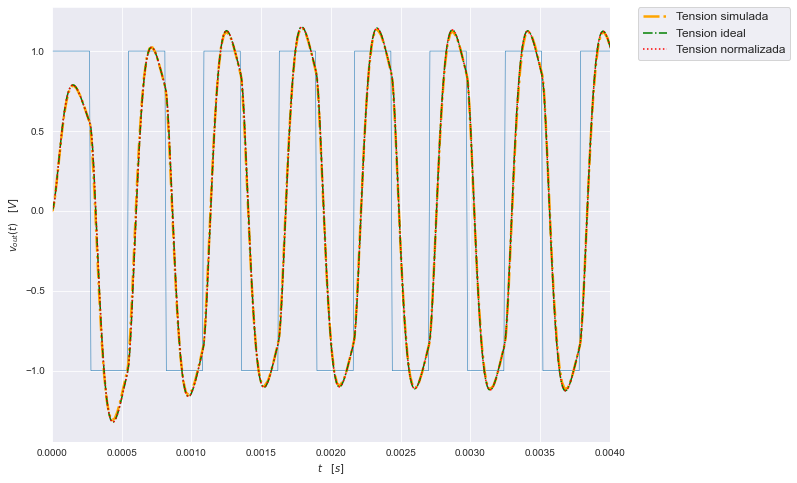

In [28]:
t = np.linspace(0, 10e-3, 1000, endpoint=False)
f = 1850.0809 
u = signal.square(2 * np.pi * f * t)
sns.set_style('darkgrid')
plt.figure(figsize = (10,8))
plt.plot(t,  signal.square(2 * np.pi * f * t), linewidth = .55)
t2, y2, x2 = ctrl.forced_response(Horig, T = t, U = u,return_x=True)
t22, y22, x22 = ctrl.forced_response(Hnorm, T = t, U = u,return_x=True)
sns.lineplot(x = tcua, y = ycua, color = 'orange', label = 'Tension simulada', linestyle = 'dashdot',linewidth=2.5)
sns.lineplot(x = t2, y = y2, color = 'g', label = 'Tension ideal', linestyle = '-.',linewidth= 1.5)
sns.lineplot(x = t22, y = y22, color = 'r', label = 'Tension normalizada', linestyle = 'dotted',linewidth=1.5)
plt.xlabel("$t\quad [s]$")
plt.ylabel("$v_{out}(t)\quad [V]$")
plt.xlim((0,0.004))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 12})

## Bode

In [4]:
omegaBode, magdB , phase = [],[],[]
with open("bode.txt","r") as archivo:
        for linea in archivo:
            row = linea.split()
            x = float(row[0].split(",")[0])
            y = float(row[0].split(",")[1])
            z = float(row[0].split(",")[2])
            omegaBode.append(x)
            magdB.append(y)
            phase.append(z)

In [64]:
s = ctrl.TransferFunction.s
Hnorm = (453622744.6*s**2)/(s**4 + s**3*32786.3706 + s**2*537594936.7 + s*1.318*10**12 + 1.617*10**15)
Horig = (s**2*(4.564*10**8))/(s**4+s**3*(3.288*10**4) + s**2*(5.405*10**8)+s*(1.324*10**12)+1.622*10**15)

wbode = np.arange(1e+1,1e+6,1e+1)

magOrig, phaseOrig, omegaOrig = ctrl.bode(Horig,wbode, dB = True, deg = True, plot=False)
magNorm, phaseNorm, omegaNorm = ctrl.bode(Hnorm,wbode,dB=True, deg = True, plot = False)

phaseOriginal = []
for x in phaseOrig:
    phaseOriginal.append(x*(180/cmath.pi) + 360)
    
phaseNormalizado = []
for x in phaseNorm:
    phaseNormalizado.append(x*(180/cmath.pi) + 360)
    
magdBOrig =[]
for x in magOrig:
    magdBOrig.append(20*np.log10(x))

magdBNorm =[]
for x in magNorm:
    magdBNorm.append(20*np.log10(x))
    
    
#tengo que reescalar los eje de abcisas porque ltspice grafica en Hz
omegaBodeFinal  = []  
for x in omegaBode:
    omegaBodeFinal.append(x*10**(np.log10(2*cmath.pi)))


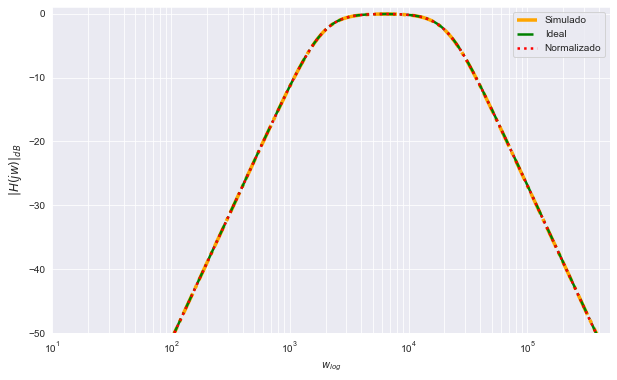

In [63]:
plt.figure(figsize=(10,6))
sns.lineplot(x = omegaBodeFinal, y = magdB, color = 'orange', linestyle = 'dashdot', linewidth = 3.5, label = "Simulado")
sns.lineplot(x = omegaOrig, y = magdBOrig, color = 'g', linestyle = '-.', linewidth = 2.5, label = "Ideal")
sns.lineplot(x = omegaNorm, y = magdBNorm, color = 'r', linestyle = 'dotted', linewidth = 2.5, label = "Normalizado")
plt.xscale("log")
plt.xlim((10,5e+5))
plt.ylim((-50,1))
plt.ylabel("$| H(jw) |_{dB}$", fontsize = 12)
plt.xlabel("$w_{log}$")
plt.grid(True, which="both", ls="-")

Text(0, 0.5, 'Fase [grados]')

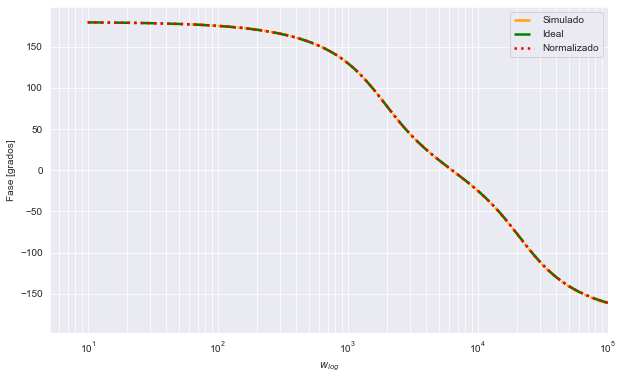

In [68]:
plt.figure(figsize=(10,6))
sns.lineplot(x = omegaBodeFinal, y = phase, color = 'orange', linestyle = 'dashdot', linewidth = 2.5, label = "Simulado")
sns.lineplot(x = omegaOrig, y = phaseOriginal, color = 'g', linestyle = '-.', linewidth = 2.5, label = "Ideal")
sns.lineplot(x = omegaNorm, y = phaseNormalizado, color = 'r', linestyle = 'dotted', linewidth = 2.5, label = "Normalizado")
plt.xscale("log")
plt.xlim((0,1e+5))
plt.grid(True, which="both", ls="-")
#plt.ylim((-50,1))
plt.xlabel("$w_{log}$")
plt.ylabel("Fase [grados]")

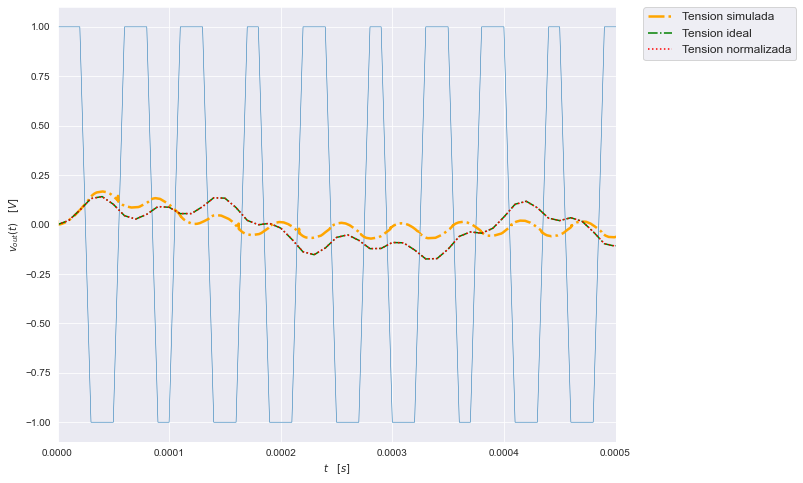

In [84]:
tc,yc = getTxt("cuadrada10f0.txt")

y_c = []
for x in yc:
    y_c.append(x*(-1))


t = np.linspace(0, 10e-3, 1000, endpoint=False)
f = 1850.0809 
u = signal.square(2 * np.pi * 10* f * t)
sns.set_style('darkgrid')
plt.figure(figsize = (10,8))
plt.plot(t,  signal.square(2 * np.pi *10* f * t), linewidth = .55)
t2, y2, x2 = ctrl.forced_response(Horig, T = t, U = u,return_x=True)
t22, y22, x22 = ctrl.forced_response(Hnorm, T = t, U = u,return_x=True)
sns.lineplot(x = tc, y = y_c, color = 'orange', label = 'Tension simulada', linestyle = 'dashdot',linewidth=2.5)
sns.lineplot(x = t2, y = y2, color = 'g', label = 'Tension ideal', linestyle = '-.',linewidth= 1.5)
sns.lineplot(x = t22, y = y22, color = 'r', label = 'Tension normalizada', linestyle = 'dotted',linewidth=1.5)
plt.xlabel("$t\quad [s]$")
plt.ylabel("$v_{out}(t)\quad [V]$")
plt.xlim((0,0.0005))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 12})